<a href="https://colab.research.google.com/github/Ziad-o-Yusef/Deep-learning-notes/blob/main/1_From_ML_to_DL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import os
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier ,GradientBoostingClassifier , RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle_MyAPI"

In [4]:
! kaggle competitions download -c tabular-playground-series-sep-2021 

 98% 584M/597M [00:03<00:00, 127MB/s]
100% 597M/597M [00:03<00:00, 160MB/s]


In [5]:
! unzip /content/tabular-playground-series-sep-2021.zip

Archive:  /content/tabular-playground-series-sep-2021.zip
  inflating: sample_solution.csv     
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd


In [76]:
train_df = pd.read_csv("/content/train.csv")


In [8]:
train_df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


# ML MODEL

In [77]:
train_df.shape

(957919, 120)

In [78]:
train_df.isnull().values.sum()

1820782

In [79]:
def null_values() :  
    lst = train_df.isnull().sum()
    for i in range(len(lst)) :
        if lst[i] != 0 :
            x= lst[i]
            col = train_df.columns[i]
            y= (x/train_df.shape[0])*100
            print("col num : " +str(i) + " /  " + col + " / " + str(x) + " nulls /"+ str(round(y,2)) +" %")
null_values()         

col num : 1 /  f1 / 15247 nulls /1.59 %
col num : 2 /  f2 / 15190 nulls /1.59 %
col num : 3 /  f3 / 15491 nulls /1.62 %
col num : 4 /  f4 / 15560 nulls /1.62 %
col num : 5 /  f5 / 15405 nulls /1.61 %
col num : 6 /  f6 / 15521 nulls /1.62 %
col num : 7 /  f7 / 15504 nulls /1.62 %
col num : 8 /  f8 / 15373 nulls /1.6 %
col num : 9 /  f9 / 15249 nulls /1.59 %
col num : 10 /  f10 / 15223 nulls /1.59 %
col num : 11 /  f11 / 15425 nulls /1.61 %
col num : 12 /  f12 / 15593 nulls /1.63 %
col num : 13 /  f13 / 15464 nulls /1.61 %
col num : 14 /  f14 / 15222 nulls /1.59 %
col num : 15 /  f15 / 15509 nulls /1.62 %
col num : 16 /  f16 / 15444 nulls /1.61 %
col num : 17 /  f17 / 15427 nulls /1.61 %
col num : 18 /  f18 / 15325 nulls /1.6 %
col num : 19 /  f19 / 15474 nulls /1.62 %
col num : 20 /  f20 / 15455 nulls /1.61 %
col num : 21 /  f21 / 15454 nulls /1.61 %
col num : 22 /  f22 / 15278 nulls /1.59 %
col num : 23 /  f23 / 15356 nulls /1.6 %
col num : 24 /  f24 / 15630 nulls /1.63 %
col num : 25 

In [80]:
for i in train_df.columns:
  train_df[i].fillna(train_df[i].mean(),inplace = True)


In [81]:
train_df.drop(columns=["id"],inplace = True)


In [82]:
train_df.shape

(957919, 119)

In [15]:
train_df.isna().values.sum()

0

In [16]:
train_df.select_dtypes(include=["object"])

""
0
1
2
3
4
...
957914
957915
957916
957917


In [83]:
from sklearn.model_selection import train_test_split
x = train_df.drop(columns=["claim"])
y = train_df['claim']

In [84]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.2)

In [85]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test =  sc.fit_transform(x_test)

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
Lr = LogisticRegression()
Lr.fit(x_train,y_train)
y_pred = Lr.predict(x_test)
acc = accuracy_score(y_pred,y_test)
print(acc)

0.5242504593285452


In [93]:
train_df = pd.read_csv("/content/train.csv")
train_df.drop(columns=["id"],inplace = True)
train_df.dropna(inplace=True)
train_df.shape

(359464, 119)

In [94]:
train_df['claim'].value_counts()

0    310909
1     48555
Name: claim, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x = train_df.drop(columns=["claim"])
y = train_df['claim']

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.2)
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test =  pca.transform(x_test)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test =  sc.fit_transform(x_test)



In [111]:
ppn = Perceptron(eta0=1, random_state=1)
Lr  = LogisticRegression()
rf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors= 5)
nb = GaussianNB()
dt = DecisionTreeClassifier()
lda = LinearDiscriminantAnalysis()
ada = AdaBoostClassifier()
Gb = GradientBoostingClassifier()

In [98]:
acc_dic = {}
tr_acc =[]

In [99]:
lda.fit(x_train,y_train)
rt_acc = round(accuracy_score(lda.predict(x_train),y_train)*100,3)
y_pred = lda.predict(x_test)
acc = round(accuracy_score(y_pred,y_test)*100,3)
acc_dic['Linear Discriminant Analysis'] = acc
tr_acc.append(rt_acc)


In [100]:
dt.fit(x_train,y_train)
rt_acc = round(accuracy_score(dt.predict(x_train),y_train)*100,3)
y_pred = dt.predict(x_test)
acc = round(accuracy_score(y_pred,y_test)*100,3)
acc_dic['Decision Tree Classifier'] = acc
tr_acc.append(rt_acc)


In [101]:
nb.fit(x_train,y_train)
rt_acc = round(accuracy_score(nb.predict(x_train),y_train)*100,3)
y_pred = nb.predict(x_test)
acc = round(accuracy_score(y_pred,y_test)*100,3)
acc_dic['Gaussian Nieve Bayes'] = acc
tr_acc.append(rt_acc)


In [102]:
ppn.fit(x_train,y_train)
rt_acc = round(accuracy_score(ppn.predict(x_train),y_train)*100,3)
y_pred = ppn.predict(x_test)
acc = round(accuracy_score(y_pred,y_test)*100,3)
acc_dic['Perceptron'] = acc
tr_acc.append(rt_acc)


In [104]:
Lr.fit(x_train,y_train)
rt_acc = round(accuracy_score(Lr.predict(x_train),y_train)*100,3)
y_pred = Lr.predict(x_test)
acc = round(accuracy_score(y_pred,y_test)*100,3)
acc_dic['Logistic Regression'] = acc
tr_acc.append(rt_acc)


In [105]:
knn.fit(x_train,y_train)
rt_acc = round(accuracy_score(knn.predict(x_train),y_train)*100,3)
y_pred = knn.predict(x_test)
acc = round(accuracy_score(y_pred,y_test)*100,3)
acc_dic['K Neighbors Classifier'] = acc
tr_acc.append(rt_acc)


In [112]:
ada.fit(x_train,y_train)
rt_acc = round(accuracy_score(ada.predict(x_train),y_train)*100,3)
y_pred = ada.predict(x_test)
acc = round(accuracy_score(y_pred,y_test)*100,3)
acc_dic['AdaBoost Classifier'] = acc
tr_acc.append(rt_acc)

In [113]:
Gb.fit(x_train,y_train)
rt_acc = round(accuracy_score(Gb.predict(x_train),y_train)*100,3)
y_pred = Gb.predict(x_test)
acc = round(accuracy_score(y_pred,y_test)*100,3)
acc_dic['Gradient Boosting Classifier'] = acc
tr_acc.append(rt_acc)

In [114]:
acc_df = pd.DataFrame()
acc_df["Algurithm"] = acc_dic.keys()
acc_df["Validation accuracy"] = acc_dic.values()
acc_df['Trainig accuracy'] = tr_acc

In [115]:
acc_df

,Algurithm,Validation accuracy,Trainig accuracy
0,Linear Discriminant Analysis,86.465,86.499
1,Decision Tree Classifier,70.591,100.000
2,Gaussian Nieve Bayes,86.465,86.499
3,Perceptron,80.913,78.566
4,Logistic Regression,86.465,86.499
5,K Neighbors Classifier,85.056,86.942
6,AdaBoos tClassifier,86.465,86.499
7,Gradient Boosting Classifier,86.039,86.500


In [35]:
import numpy as np


In [36]:
train_df['claim'].value_counts()

0    310909
1     48555
Name: claim, dtype: int64

In [88]:
df_0= train_df[train_df['claim'] == 0].sample(150000, random_state=101)
df_1= train_df[train_df['claim'] == 1].sample(48555, random_state=101)
p_data =pd.DataFrame(train_df)
p_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
p_data['claim'].value_counts()

0    150000
1     48555
Name: claim, dtype: int64

In [89]:
p_data.isna().values.sum()

0

In [90]:
px = p_data.drop(columns=['claim'])
py = p_data['claim']
px_train,px_test,py_train,py_test = train_test_split(px,py,test_size=0.2)
pca = PCA()
px_train = pca.fit_transform(px_train)
px_test =  pca.transform(px_test)
px_train =sc.fit_transform(px_train)
px_test =sc.fit_transform(px_test)

In [91]:
lda.fit(px_train,py_train)
y_pred = lda.predict(px_test)
acc = accuracy_score(y_pred,py_test)
print( acc )

0.7562388255143411


# DL MODEL 


In [34]:
print(len(y_train.unique()))
print(len(train_df.columns)-1)


2
118


In [35]:
import tensorflow as tf

In [36]:
dl_model_1 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape =(len(train_df.columns)-1)),
    tf.keras.layers.Dense(units=90,activation='relu'),
    tf.keras.layers.Dense(units=70,activation='relu'),
    tf.keras.layers.Dense(units=50,activation='relu'),
    tf.keras.layers.Dense(units=30,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='relu'),
    tf.keras.layers.Dense(units=5,activation='relu'),
    tf.keras.layers.Dense(units=len(y_train.unique()),activation='sigmoid')                                    
                                       ])

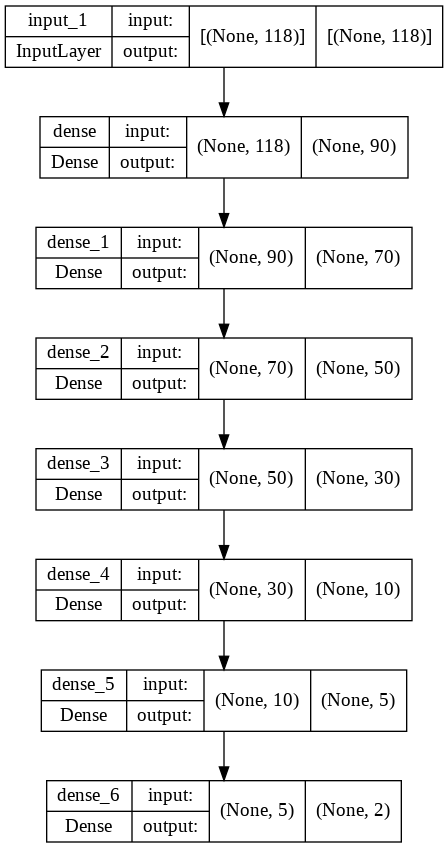

In [37]:
from keras.utils.vis_utils import plot_model
plot_model(dl_model_1,show_shapes=True, show_layer_names=True)

In [38]:
dl_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 90)                10710     
                                                                 
 dense_1 (Dense)             (None, 70)                6370      
                                                                 
 dense_2 (Dense)             (None, 50)                3550      
                                                                 
 dense_3 (Dense)             (None, 30)                1530      
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
 dense_6 (Dense)             (None, 2)                 1

In [39]:
from tensorflow.python import metrics
dl_model_1.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [92]:
hist = dl_model_1.fit(
    x = x_train,
    y= y_train,
    validation_data = (x_test,y_test),
    epochs = 10
)

Epoch 1/10
4964/4964 [==============================] - 16s 3ms/step - loss: 0.5570 - accuracy: 0.7553 - val_loss: 0.5551 - val_accuracy: 0.7562
Epoch 2/10
4964/4964 [==============================] - 14s 3ms/step - loss: 0.5549 - accuracy: 0.7553 - val_loss: 0.5557 - val_accuracy: 0.7562
Epoch 3/10
4964/4964 [==============================] - 13s 3ms/step - loss: 0.5516 - accuracy: 0.7553 - val_loss: 0.5575 - val_accuracy: 0.7562
Epoch 4/10
4964/4964 [==============================] - 14s 3ms/step - loss: 0.5461 - accuracy: 0.7553 - val_loss: 0.5634 - val_accuracy: 0.7561
Epoch 5/10
4964/4964 [==============================] - 14s 3ms/step - loss: 0.5393 - accuracy: 0.7552 - val_loss: 0.5708 - val_accuracy: 0.7561
Epoch 6/10
4964/4964 [==============================] - 14s 3ms/step - loss: 0.5331 - accuracy: 0.7568 - val_loss: 0.5756 - val_accuracy: 0.7500
Epoch 7/10
4964/4964 [==============================] - 13s 3ms/step - loss: 0.5275 - accuracy: 0.7594 - val_loss: 0.5793 - val_ac

In [47]:
dl_model_1.evaluate(x_test,y_test)

2247/2247 [==============================] - 5s 2ms/step - loss: 0.4083 - accuracy: 0.8642


[0.40829887986183167, 0.864173173904419]

In [48]:
y_perd_dl = dl_model_1.predict(x_test)


In [50]:
y_perd_dl = dl_model_1.predict(x_test)
y_perd_dl_class = []
for i in y_perd_dl:
    y_perd_dl_class.append(i.argmax())


from sklearn.metrics import classification_report

print(classification_report(y_perd_dl_class,y_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93     71893
           1       0.00      0.00      0.00         0

    accuracy                           0.86     71893
   macro avg       0.50      0.43      0.46     71893
weighted avg       1.00      0.86      0.93     71893



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
dl_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape =(len(train_df.columns)-1)),
    tf.keras.layers.Dense(units=59,activation='relu'),
    tf.keras.layers.Dense(units=29,activation='relu'),
    tf.keras.layers.Dense(units=14,activation='relu'),
    tf.keras.layers.Dense(units=7,activation='relu'),
    tf.keras.layers.Dense(units=3,activation='relu'),
    tf.keras.layers.Dense(units=len(y_train.unique()),activation='sigmoid')  




                                       ])

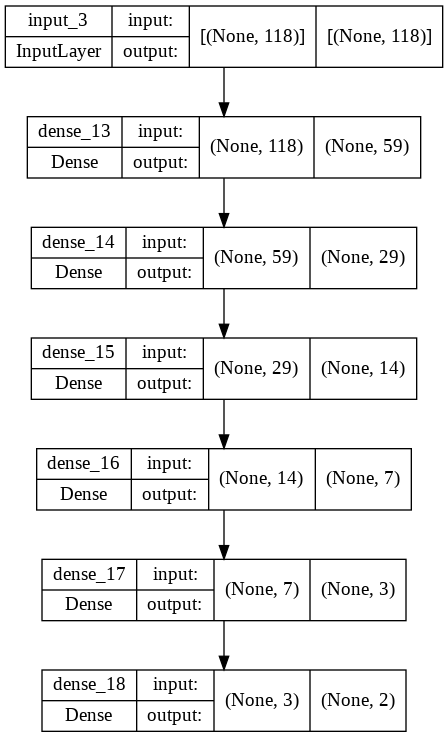

In [69]:
from keras.utils.vis_utils import plot_model
plot_model(dl_model_2,show_shapes=True, show_layer_names=True)

In [70]:

dl_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 59)                7021      
                                                                 
 dense_14 (Dense)            (None, 29)                1740      
                                                                 
 dense_15 (Dense)            (None, 14)                420       
                                                                 
 dense_16 (Dense)            (None, 7)                 105       
                                                                 
 dense_17 (Dense)            (None, 3)                 24        
                                                                 
 dense_18 (Dense)            (None, 2)                 8         
                                                                 
Total params: 9,318
Trainable params: 9,318
Non-traina

In [73]:
from tensorflow.python import metrics
from keras.utils.vis_utils import plot_model

dl_model_2.compile(
    optimizer='adadelta',loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=tf.keras.metrics.BinaryAccuracy(
    name='binary_accuracy', dtype=None, threshold=0.5
)
)

In [74]:
hist = dl_model_2.fit(
    x = x_train,
    y= y_train,
    validation_data = (x_test,y_test),
    epochs = 15
)

Epoch 1/15
8987/8987 [==============================] - 28s 3ms/step - loss: 0.4023 - binary_accuracy: 0.8651 - val_loss: 0.4036 - val_binary_accuracy: 0.8642
Epoch 2/15
8987/8987 [==============================] - 27s 3ms/step - loss: 0.4020 - binary_accuracy: 0.8651 - val_loss: 0.4034 - val_binary_accuracy: 0.8642
Epoch 3/15
8987/8987 [==============================] - 27s 3ms/step - loss: 0.4017 - binary_accuracy: 0.8651 - val_loss: 0.4031 - val_binary_accuracy: 0.8642
Epoch 4/15
8987/8987 [==============================] - 27s 3ms/step - loss: 0.4014 - binary_accuracy: 0.8651 - val_loss: 0.4028 - val_binary_accuracy: 0.8642
Epoch 5/15
8987/8987 [==============================] - 27s 3ms/step - loss: 0.4012 - binary_accuracy: 0.8651 - val_loss: 0.4026 - val_binary_accuracy: 0.8642
Epoch 6/15
8987/8987 [==============================] - 35s 4ms/step - loss: 0.4009 - binary_accuracy: 0.8651 - val_loss: 0.4024 - val_binary_accuracy: 0.8642
Epoch 7/15
8987/8987 [========================

In [75]:
dl_model_2.evaluate(x_test,y_test)

2247/2247 [==============================] - 5s 2ms/step - loss: 0.4011 - binary_accuracy: 0.8642


[0.40105852484703064, 0.864173173904419]

In [76]:
y_perd_d2 = dl_model_2.predict(x_test)
y_perd_d2_class = []
for i in y_perd_d2:
    y_perd_d2_class.append(i.argmax())


from sklearn.metrics import classification_report

print(classification_report(y_perd_d2_class,y_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93     71893
           1       0.00      0.00      0.00         0

    accuracy                           0.86     71893
   macro avg       0.50      0.43      0.46     71893
weighted avg       1.00      0.86      0.93     71893



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [160]:
dl_model_3 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape =(len(train_df.columns)-1)),
    tf.keras.layers.Dense(units=90,activation='relu'),
    tf.keras.layers.Dense(units=50,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='relu'),
    tf.keras.layers.Dense(units=5,activation='relu'),
    tf.keras.layers.Dense(units=len(y_train.unique()),activation='sigmoid')  

                                       ])

In [161]:
dl_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 90)                10710     
                                                                 
 dense_20 (Dense)            (None, 50)                4550      
                                                                 
 dense_21 (Dense)            (None, 10)                510       
                                                                 
 dense_22 (Dense)            (None, 5)                 55        
                                                                 
 dense_23 (Dense)            (None, 2)                 12        
                                                                 
Total params: 15,837
Trainable params: 15,837
Non-trainable params: 0
_________________________________________________________________


In [162]:
dl_model_3.compile(
    optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=tf.keras.metrics.BinaryAccuracy()
)

In [163]:
hist = dl_model_3.fit(
    x = x_train,
    y= y_train,
    validation_data = (x_test,y_test),
    epochs = 10
)

Epoch 1/10
8987/8987 [==============================] - 24s 3ms/step - loss: 0.3981 - binary_accuracy: 0.8648 - val_loss: 0.3992 - val_binary_accuracy: 0.8646
Epoch 2/10
8987/8987 [==============================] - 26s 3ms/step - loss: 0.3945 - binary_accuracy: 0.8650 - val_loss: 0.3967 - val_binary_accuracy: 0.8646
Epoch 3/10
8987/8987 [==============================] - 25s 3ms/step - loss: 0.3936 - binary_accuracy: 0.8650 - val_loss: 0.3970 - val_binary_accuracy: 0.8646
Epoch 4/10
8987/8987 [==============================] - 25s 3ms/step - loss: 0.3927 - binary_accuracy: 0.8650 - val_loss: 0.3988 - val_binary_accuracy: 0.8646
Epoch 5/10
8987/8987 [==============================] - 23s 3ms/step - loss: 0.3912 - binary_accuracy: 0.8648 - val_loss: 0.4012 - val_binary_accuracy: 0.8642
Epoch 6/10
8987/8987 [==============================] - 26s 3ms/step - loss: 0.3890 - binary_accuracy: 0.8647 - val_loss: 0.4007 - val_binary_accuracy: 0.8637
Epoch 7/10
8987/8987 [========================

In [164]:
dl_model_3.evaluate(x_test,y_test)

2247/2247 [==============================] - 5s 2ms/step - loss: 0.4110 - binary_accuracy: 0.8601


[0.41096219420433044, 0.8600906729698181]